In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

# 사전준비

In [12]:
#bookList
bookDic = {
            "1":"Python",
            "2":"C언어",
            "3":"Java",
            "4":"C++",
            "5":"C#",
            "6":"Visual Basic",
            "7":"JavaScript",
            "8":"SQL",
            "9":"PHP",
            "10":"R" ,
            "11":"파이썬" ,#한국어 포함
            "12":"자바",
            "13":"비쥬얼베이직",
            "14":"자바스크립트"          
          }
bookDic


{'1': 'Python',
 '2': 'C언어',
 '3': 'Java',
 '4': 'C++',
 '5': 'C#',
 '6': 'Visual Basic',
 '7': 'JavaScript',
 '8': 'SQL',
 '9': 'PHP',
 '10': 'R',
 '11': '파이썬',
 '12': '자바',
 '13': '비쥬얼베이직',
 '14': '자바스크립트'}

In [145]:
import os
import sys
import urllib.request
client_id = "LrV41VVZ3cZDLfkydJdN"
client_secret = "OBB4AQ4kki"
book_df= pd.DataFrame({
    "bookName" : [],
    "title" : [],
    "publisher" : [],
    "isbn" : [],
    "price" : [],
    "year" : []
})
for bookName in bookDic.values():
    
    encText = urllib.parse.quote(bookName)    
    
    startNum=1
    #검색어 조회
    display=100 #한번 조회 했을시 개수
    while startNum <= 1000 and display == 100:
        url = "https://openapi.naver.com/v1/search/book_adv.xml?d_titl=" + encText+"&display=100&start="+str(startNum)+"&d_catg=280020" # json 결과
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            soup = BeautifulSoup(response_body.decode('utf-8'),"html.parser")
            
            titleList = soup.find_all("title")[1:]
            bookList = [0]*len(titleList)
            pubList = soup.find_all("publisher")
            isbnList = soup.find_all("isbn")
            priceList = soup.find_all("price")
            yearList = soup.find_all("pubdate")
            for i in range(len(priceList)):
                bookList[i] = bookName
                titleList[i] = titleList[i].text
                pubList[i] = pubList[i].text
                isbnList[i] = isbnList[i].text
                priceList[i] = priceList[i].text
                yearList[i] = yearList[i].text[0:4]
            #title/publisher/isbn /price(추가과제)
            tmp_Df = pd.DataFrame({
                    "bookName" : bookList,
                    "title" : titleList,
                    "publisher" : pubList,
                    "isbn" : isbnList,
                    "price" : priceList,
                    "year"  : yearList
            })
            book_df=pd.concat([book_df,tmp_Df])
            startNum +=100
            display = int(soup.find("display").text)
            print(bookName,startNum,display)
        else:
            print("Error Code:" + rescode)


Python 101 100
Python 201 94
C언어 101 100
C언어 201 100
C언어 301 100
C언어 401 100
C언어 501 100
C언어 601 100
C언어 701 100
C언어 801 85
Java 101 100
Java 201 100
Java 301 100
Java 401 100
Java 501 100
Java 601 100
Java 701 100
Java 801 22
C++ 101 100
C++ 201 100
C++ 301 100
C++ 401 100
C++ 501 100
C++ 601 100
C++ 701 100
C++ 801 100
C++ 901 100
C++ 1001 100
C# 101 100
C# 201 100
C# 301 97
Visual Basic 101 100
Visual Basic 201 100
Visual Basic 301 100
Visual Basic 401 15
JavaScript 101 100
JavaScript 201 59
SQL 101 100
SQL 201 100
SQL 301 100
SQL 401 100
SQL 501 55
PHP 101 100
PHP 201 100
PHP 301 2
R 101 100
R 201 100
R 301 49
파이썬 101 100
파이썬 201 100
파이썬 301 100
파이썬 401 100
파이썬 501 100
파이썬 601 100
파이썬 701 44
자바 101 100
자바 201 100
자바 301 100
자바 401 100
자바 501 100
자바 601 100
자바 701 100
자바 801 100
자바 901 13
비쥬얼베이직 101 10
자바스크립트 101 100
자바스크립트 201 100
자바스크립트 301 60


# 문제1 상위 9개 언어 정보 수집
 - https://developers.naver.com/docs/search/book/

In [146]:
book_df["bookName"].unique()
book_df.loc[book_df["bookName"] == "파이썬", "bookName"] ="Python"
book_df.loc[book_df["bookName"] == "자바", "bookName"] ="Java"
book_df.loc[book_df["bookName"] == "비쥬얼베이직", "bookName"] ="Visual Basic"
book_df.loc[book_df["bookName"] == "자바스크립트", "bookName"] ="JavaScript"

In [147]:
book_df["bookName"].unique()

array(['Python', 'C언어', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'R'], dtype=object)

In [148]:
book_df

,bookName,title,publisher,isbn,price,year
0,Python,Effective <b>Python</b> 2nd 이펙티브 파이썬 : 파이썬 코딩의...,길벗,1165213192 9791165213190,32000,2020
1,Python,파이썬 딥러닝 파이토치(<b>Python</b> Deep Learning PyTorch),정보문화사,8956748578 9788956748573,25000,2020
2,Python,파이썬 딥러닝 텐서플로 (<b>Python</b> Deep Learning Tens...,정보문화사,8956749094 9788956749099,27000,2021
3,Python,파이썬 딥러닝 머신러닝 입문 (<b>Python</b> Deep Learning M...,정보문화사,8956749000 9788956749006,25000,2021
4,Python,<b>Python</b>으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,118557879X 9791185578798,26000,2021
...,...,...,...,...,...,...
55,JavaScript,<b>자바스크립트</b> 2ND EDITION월드와이드웹용,B&B(비앤비),8986929546 9788986929546,13000,2000
56,JavaScript,L교수와함께하는<b>자바스크립트</b>,정일,8988784545 9788988784549,20000,2001
57,JavaScript,<b>자바</b> & 베이직 <b>스크립트</b> (따라해보세요),한글과컴퓨터,8983540249 9788983540249,15000,1997
58,JavaScript,알기쉬운 <b>자바 스크립트</b> 활용,정보문화사,8976273281 9788976273284,20000,1997


# 문제2 Book_df 에 ISBN으로 중복 체크하기
 - unique

In [149]:
book_df["isbn"].unique()

array(['1165213192 9791165213190', '8956748578 9788956748573',
       '8956749094 9788956749099', ..., '8970500901 9788970500904',
       '8940668146 9788940668146', '8970001034 9788970001036'],
      dtype=object)

In [150]:
len(book_df["isbn"].unique())

5340

In [151]:
len(book_df)

6105

In [152]:
#중복 확인하기
book_df.duplicated("isbn")

0     False
1     False
2     False
3     False
4     False
      ...  
55     True
56     True
57     True
58     True
59     True
Length: 6105, dtype: bool

In [153]:
#중복 지우기 작업
book_df.drop_duplicates("isbn", keep = "last") #중복시 뒤에만 존재하게 된다.

,bookName,title,publisher,isbn,price,year
4,Python,<b>Python</b>으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,118557879X 9791185578798,26000,2021
5,Python,AI 수학 with <b>Python</b>(처음 만나는) (한 권으로 배우는 인공...,영진닷컴,8931463375 9788931463378,23000,2021
6,Python,<b>Python</b>으로 배우는 문제해결과 인공지능,인피니티북스,1185578811 9791185578811,23000,2021
7,Python,<b>Python</b>을 이용한 개인화 추천 시스템,청람,8959727660 9788959727667,18000,2020
9,Python,OpenCV-<b>Python</b>으로 배우는 영상처리 및 응용,생능출판사,8970504419 9788970504414,35000,2020
...,...,...,...,...,...,...
55,JavaScript,<b>자바스크립트</b> 2ND EDITION월드와이드웹용,B&B(비앤비),8986929546 9788986929546,13000,2000
56,JavaScript,L교수와함께하는<b>자바스크립트</b>,정일,8988784545 9788988784549,20000,2001
57,JavaScript,<b>자바</b> & 베이직 <b>스크립트</b> (따라해보세요),한글과컴퓨터,8983540249 9788983540249,15000,1997
58,JavaScript,알기쉬운 <b>자바 스크립트</b> 활용,정보문화사,8976273281 9788976273284,20000,1997


In [154]:
# book_df.drop_duplicates("isbn")=len(book_df["isbn"].unique())
book_df = book_df.drop_duplicates("isbn",keep="last")

In [155]:
book_df

,bookName,title,publisher,isbn,price,year
4,Python,<b>Python</b>으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,118557879X 9791185578798,26000,2021
5,Python,AI 수학 with <b>Python</b>(처음 만나는) (한 권으로 배우는 인공...,영진닷컴,8931463375 9788931463378,23000,2021
6,Python,<b>Python</b>으로 배우는 문제해결과 인공지능,인피니티북스,1185578811 9791185578811,23000,2021
7,Python,<b>Python</b>을 이용한 개인화 추천 시스템,청람,8959727660 9788959727667,18000,2020
9,Python,OpenCV-<b>Python</b>으로 배우는 영상처리 및 응용,생능출판사,8970504419 9788970504414,35000,2020
...,...,...,...,...,...,...
55,JavaScript,<b>자바스크립트</b> 2ND EDITION월드와이드웹용,B&B(비앤비),8986929546 9788986929546,13000,2000
56,JavaScript,L교수와함께하는<b>자바스크립트</b>,정일,8988784545 9788988784549,20000,2001
57,JavaScript,<b>자바</b> & 베이직 <b>스크립트</b> (따라해보세요),한글과컴퓨터,8983540249 9788983540249,15000,1997
58,JavaScript,알기쉬운 <b>자바 스크립트</b> 활용,정보문화사,8976273281 9788976273284,20000,1997


# 문제3 각 언어별 출판물의 양으로 순위를 매기자.

In [156]:
import numpy as np
pub_df = pd.DataFrame(np.array([
    ["Python" , len(book_df[book_df["bookName"] == "Python"])],
     ["C언어" , len(book_df[book_df["bookName"] == "C언어"])],
     ["Java" , len(book_df[book_df["bookName"] == "Java"])],
     ["C++" , len(book_df[book_df["bookName"] == "C++"])],
     ["C#" , len(book_df[book_df["bookName"] == "C#"])],
     ["Visual Basic" , len(book_df[book_df["bookName"] == "Visual Basic"])],
     ["JavaScript" , len(book_df[book_df["bookName"] == "JavaScript"])],
     ["SQL" , len(book_df[book_df["bookName"] == "SQL"])],
     ["PHP" , len(book_df[book_df["bookName"] == "PHP"])],
     ["R" , len(book_df[book_df["bookName"] == "R"])],
    ]),
  columns = ["language","cnt"])

In [157]:
pub_df.set_index("language",inplace=True)

In [158]:
pub_df

,cnt
language,
Python,792
C언어,735
Java,1021
C++,976
C#,289
Visual Basic,314
JavaScript,382
SQL,404
PHP,189


In [159]:
pub_df.sort_values(by = "cnt", inplace = True)

In [160]:
pub_df["cnt"] = pub_df["cnt"].astype(int)

In [161]:
pub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Java to C++
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cnt     10 non-null     int32
dtypes: int32(1)
memory usage: 120.0+ bytes


In [162]:
pub_df.sort_values(by = "cnt", inplace = True, ascending=False)

In [163]:
pub_df

,cnt
language,
Java,1021
C++,976
Python,792
C언어,735
SQL,404
JavaScript,382
Visual Basic,314
C#,289
R,238


In [164]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

import matplotlib.pyplot as plt
%matplotlib inline

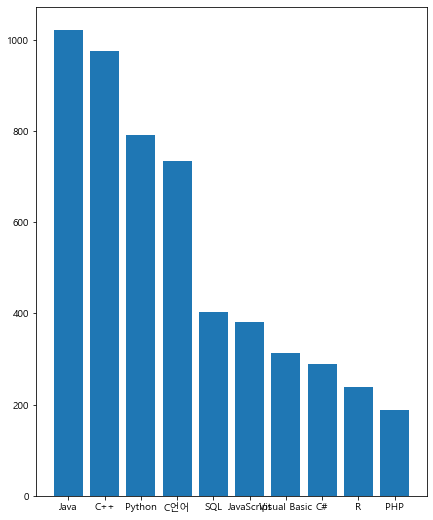

In [165]:
plt.figure(figsize =(7,9))
plt.bar(
    pub_df.index,
    pub_df["cnt"]
)
plt.show()

# 문제4 우리나라 출판사 순위를 나타내라

In [166]:
bookPivot = book_df.pivot_table(index = "publisher", aggfunc=len ,values ="bookName")
bookPivot

,bookName
publisher,
(주)쉬프트웍스,1
21세기사,60
ADDISONWESLEY,1
Addison-WesleyProfessional,1
AddisonWesley,1
...,...
휴먼사이언스,5
휴먼싸이언스,19
휴먼컬처아리랑,2


In [167]:
bookPivot.rename(columns = {"bookName":"cnt"},inplace = True)
bookPivot

,cnt
publisher,
(주)쉬프트웍스,1
21세기사,60
ADDISONWESLEY,1
Addison-WesleyProfessional,1
AddisonWesley,1
...,...
휴먼사이언스,5
휴먼싸이언스,19
휴먼컬처아리랑,2


In [168]:
#우리나라 출판사 20위
bookPivot.sort_values(by = "cnt",inplace = True, ascending = False)
bookPivot.head(20)

,cnt
publisher,
한빛미디어,344
에이콘출판,280
정보문화사,245
영진닷컴,195
Packt(GCOScience),163
홍릉과학출판사,121
성안당,113
위키북스,108
인포북,107


# 문제 5 최근 2년과 3년간의 비교 데이터

In [169]:
book_df

,bookName,title,publisher,isbn,price,year
4,Python,<b>Python</b>으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,118557879X 9791185578798,26000,2021
5,Python,AI 수학 with <b>Python</b>(처음 만나는) (한 권으로 배우는 인공...,영진닷컴,8931463375 9788931463378,23000,2021
6,Python,<b>Python</b>으로 배우는 문제해결과 인공지능,인피니티북스,1185578811 9791185578811,23000,2021
7,Python,<b>Python</b>을 이용한 개인화 추천 시스템,청람,8959727660 9788959727667,18000,2020
9,Python,OpenCV-<b>Python</b>으로 배우는 영상처리 및 응용,생능출판사,8970504419 9788970504414,35000,2020
...,...,...,...,...,...,...
55,JavaScript,<b>자바스크립트</b> 2ND EDITION월드와이드웹용,B&B(비앤비),8986929546 9788986929546,13000,2000
56,JavaScript,L교수와함께하는<b>자바스크립트</b>,정일,8988784545 9788988784549,20000,2001
57,JavaScript,<b>자바</b> & 베이직 <b>스크립트</b> (따라해보세요),한글과컴퓨터,8983540249 9788983540249,15000,1997
58,JavaScript,알기쉬운 <b>자바 스크립트</b> 활용,정보문화사,8976273281 9788976273284,20000,1997


In [170]:
book_df["year"] = book_df["year"].astype(int)

C:\Users\wjm\AppData\Local\Temp/ipykernel_13284/4025488212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_df["year"] = book_df["year"].astype(int)


In [173]:
book_df=book_df[book_df["year"] >=2017]
book_df

,bookName,title,publisher,isbn,price,year
4,Python,<b>Python</b>으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,118557879X 9791185578798,26000,2021
5,Python,AI 수학 with <b>Python</b>(처음 만나는) (한 권으로 배우는 인공...,영진닷컴,8931463375 9788931463378,23000,2021
6,Python,<b>Python</b>으로 배우는 문제해결과 인공지능,인피니티북스,1185578811 9791185578811,23000,2021
7,Python,<b>Python</b>을 이용한 개인화 추천 시스템,청람,8959727660 9788959727667,18000,2020
9,Python,OpenCV-<b>Python</b>으로 배우는 영상처리 및 응용,생능출판사,8970504419 9788970504414,35000,2020
...,...,...,...,...,...,...
23,JavaScript,"Try! helloworld <b>자바스크립트</b> (하루 15분, 누구나 프로그...",길벗,1160504733 9791160504736,22000,2018
43,JavaScript,BBC micro:bit 프로그래밍 with <b>자바스크립트</b> 블록 에디터 ...,제이펍,1185890955 9791185890951,28000,2017
59,JavaScript,<b>자바스크립트</b> + 제이쿼리 입문 (예제로 <b>자바스크립트</b> & j...,인포앤북,1192038002 9791192038001,25000,2021
62,JavaScript,실전 개발을 위한 객체 지향 <b>자바스크립트</b>,온노트,1195403925 9791195403929,5000,2018


In [184]:
five_Q =pd.pivot_table(data=book_df , index = "year",columns = "bookName", values="title" ,aggfunc=len)
five_Q

bookName,C#,C++,C언어,Java,JavaScript,PHP,Python,R,SQL,Visual Basic
year,,,,,,,,,,
2017,13.0,21.0,15.0,40.0,25.0,4.0,87.0,36.0,15.0,5.0
2018,12.0,24.0,19.0,51.0,23.0,10.0,123.0,43.0,12.0,NaN
2019,17.0,28.0,14.0,30.0,19.0,6.0,178.0,34.0,21.0,1.0
2020,11.0,24.0,9.0,20.0,14.0,4.0,165.0,28.0,18.0,1.0
2021,9.0,5.0,8.0,19.0,13.0,2.0,113.0,30.0,18.0,1.0


In [187]:
five_Q =five_Q.fillna(0)
five_Q

bookName,C#,C++,C언어,Java,JavaScript,PHP,Python,R,SQL,Visual Basic
year,,,,,,,,,,
2017,13.0,21.0,15.0,40.0,25.0,4.0,87.0,36.0,15.0,5.0
2018,12.0,24.0,19.0,51.0,23.0,10.0,123.0,43.0,12.0,0.0
2019,17.0,28.0,14.0,30.0,19.0,6.0,178.0,34.0,21.0,1.0
2020,11.0,24.0,9.0,20.0,14.0,4.0,165.0,28.0,18.0,1.0
2021,9.0,5.0,8.0,19.0,13.0,2.0,113.0,30.0,18.0,1.0


In [193]:
tmp_Q1 = five_Q.loc["2017":"2019"].sum()
tmp_Q2 = five_Q.loc["2020":"2021"].sum()


bookName
C#               42.0
C++              73.0
C언어              48.0
Java            121.0
JavaScript       67.0
PHP              20.0
Python          388.0
R               113.0
SQL              48.0
Visual Basic      6.0
dtype: float64

In [194]:
tmp_Q2

bookName
C#               20.0
C++              29.0
C언어              17.0
Java             39.0
JavaScript       27.0
PHP               6.0
Python          278.0
R                58.0
SQL              36.0
Visual Basic      2.0
dtype: float64

In [196]:
tmp_Q1 = pd.DataFrame(data = tmp_Q1)
tmp_Q2 = pd.DataFrame(data = tmp_Q2)

In [197]:
five_Q = pd.concat([tmp_Q1,tmp_Q2], axis=1)
five_Q

,0,0
bookName,,
C#,42.0,20.0
C++,73.0,29.0
C언어,48.0,17.0
Java,121.0,39.0
JavaScript,67.0,27.0
PHP,20.0,6.0
Python,388.0,278.0
R,113.0,58.0
SQL,48.0,36.0


In [198]:
five_Q.columns=["2017-2019","2020-2021"]
five_Q

,2017-2019,2020-2021
bookName,,
C#,42.0,20.0
C++,73.0,29.0
C언어,48.0,17.0
Java,121.0,39.0
JavaScript,67.0,27.0
PHP,20.0,6.0
Python,388.0,278.0
R,113.0,58.0
SQL,48.0,36.0


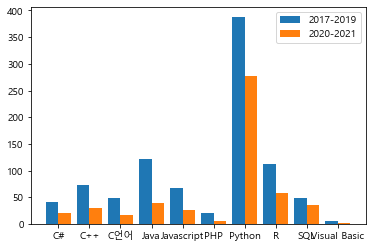

In [211]:

topics = ['C#', 'C++', 'C언어', 'Java', 'Javascript','PHP','Python','R','SQL','Visual Basic']
value_a = five_Q["2017-2019"]
value_b = five_Q["2020-2021"]
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(2, 0.8, 1, 10)
value_b_x = create_x(2, 0.8, 2, 10)
ax = plt.subplot()
ax.bar(value_a_x, value_a, label="2017-2019")
ax.bar(value_b_x, value_b, label="2020-2021")
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.legend()
plt.show()


### 파이썬으2017년도부터 2021년 현재까지 계속적으로 많이 책이 출판되고 있고 다른 언어들에 비해 월등히 높다
### 그 외의 언어를 보면 visual Basic는 점점 사라져가는 언어라서 많이 출판 되지 않고 
### PHP도 Java와 C에 비해 안쓰는 추세가 됐기때문에 출판 된 양이 적은걸 알 수 있다.
### 그 외에 아직 쓰이는 자바, 자바스크립트 C계열은 어느정도의 출판량을 유지하고있는걸 볼 수 있다.